In [22]:
import pyemu
import os
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 
import pandas as pd
import matplotlib.pyplot as plt
import psutil
import shutil
import numpy as np

In [7]:
wd = "D:/spark/animas_amrs"
os.chdir(wd)

In [8]:
t_d = os.path.join(wd, "ies_template_all")

In [11]:
org_t_d = os.path.join("master_glm_1")
if not os.path.exists(org_t_d):
    raise Exception("you need to run the '/part2_04_glm/freyberg_glm_1.ipynb' notebook")

if os.path.exists(t_d):
    shutil.rmtree(t_d)
shutil.copytree(org_t_d,t_d)

'D:/spark/animas_amrs\\ies_template_all'

In [12]:
num_workers = psutil.cpu_count(logical=False)

In [13]:
m_d = os.path.join('main_ies_1')

In [14]:
pyemu.os_utils.start_workers(t_d, # the folder which contains the "template" PEST dataset
                            'pestpp-ies', #the PEST software version we want to run
                            'animas_amrs_pp.pst', # the control file to use with PEST
                            num_workers=num_workers, #how many agents to deploy
                            worker_root='.', #where to deploy the agent directories; relative to where python is running
                            master_dir=m_d, #the manager directory
                            )

In [15]:
pst = pyemu.Pst(os.path.join(m_d,'animas_amrs_pp.pst'))

In [17]:
pr_oe = pyemu.ObservationEnsemble.from_csv(
    pst=pst,filename=os.path.join(m_d,"animas_amrs_pp.0.obs.csv")
    )
pt_oe = pyemu.ObservationEnsemble.from_csv(pst=pst,filename=os.path.join(m_d,"animas_amrs_pp.{0}.obs.csv".format(pst.control_data.noptmax)))


In [19]:
pt_oe

return type uncaught, losing Ensemble type, returning DataFrame


d009_cca_19961119  d009_cca_19970108  d009_cca_19970130   
real_name                                                            
6                    177.488            444.311            446.468  \
8                    229.289            374.642            404.136   
9                    225.743            360.657            392.312   
11                   180.535            295.642            371.325   
14                   236.609            283.814            294.172   
...                      ...                ...                ...   
288                  252.307            411.441            360.406   
290                  269.676            359.011            377.657   
292                  241.674            293.498            304.803   
293                  346.286            392.847            403.148   
base                 201.174            382.602            425.949   

           d009_cca_19970225  d009_cca_19970325  d009_cca_19970429   
real_name                                                            
6                    347.248            316.820            317.679  \
8                    393.468            405.655            329.867   
9                    416.038            415.560            418.815   
11                   425.066            283.795            334.865   
14                   302.130            308.746            284.396   
...                      ...                ...                ...   
288                  392.724            303.787            309.490   
290                  395.833            276.964            318.956   
292                  313.265            299.197            233.418   
293                  410.624            417.621            391.351   
base                 427.886            325.426            326.382   

           d009_cca_19970514  d009_cca_19970521  d009_cca_19970529   
real_name                                                            
6                    2.93631           13.74770            3.34175  \
8                    2.83988           13.56890            2.64536   
9                    2.20981           14.18770            3.32494   
11                   2.78750           14.19270            3.38371   
14                   1.69786            8.75067            2.74455   
...                      ...                ...                ...   
288                  2.74701           12.95410            2.52603   
290                  2.60865           12.90220            3.28853   
292                  1.95489            9.28254            2.72665   
293                  3.97628           17.45570            3.31745   
base                 2.97917           14.14000            3.38805   

           d009_cca_19970605  ...  m075_lso4_200707  m075_lso4_200810   
real_name                     ...                                       
6                    2.85965  ...            201844            209563  \
8                    2.96368  ...            186656            181431   
9                    3.46253  ...            228175            186505   
11                   2.94552  ...            209502            223513   
14                   2.24989  ...            204782            210536   
...                      ...  ...               ...               ...   
288                  2.81950  ...            159330            166075   
290                  2.91772  ...            220085            252954   
292                  2.16950  ...            222050            246088   
293                  3.45957  ...            171768            191901   
base                 2.92895  ...            188088            194098   

           m075_lso4_200812  m075_lso4_200902  m075_lso4_200904   
real_name                                                         
6                    185918            173760            204070  \
8                    170207            159255            178791   
9                    170059            183262            200

<Figure size 800x1050 with 0 Axes>

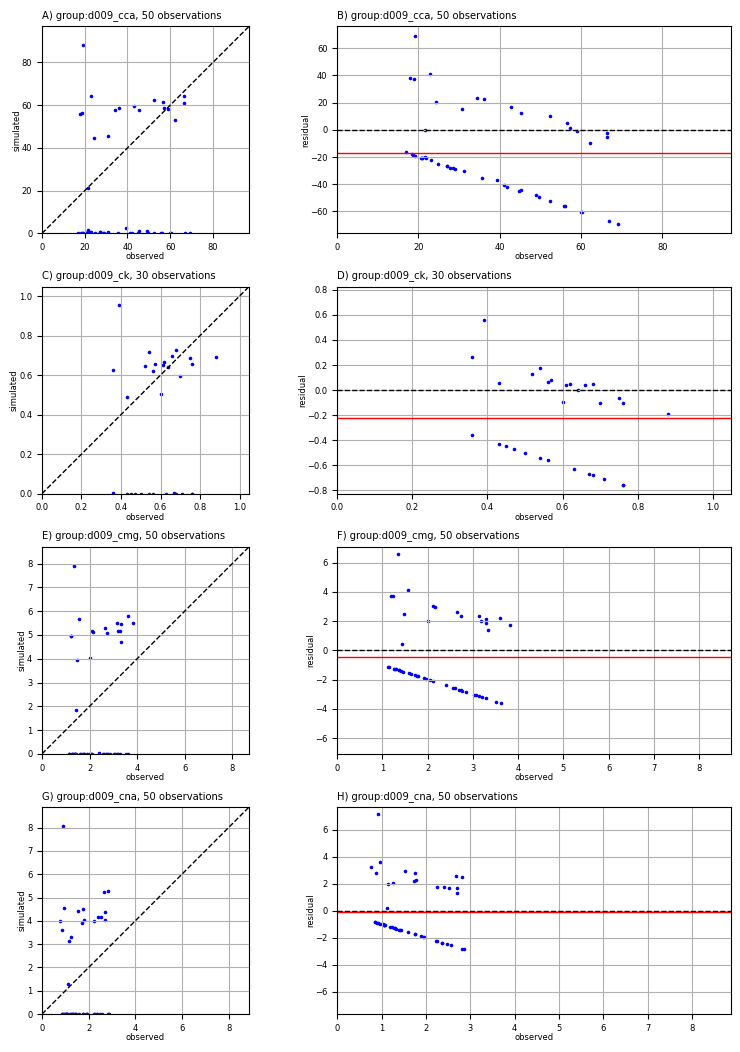

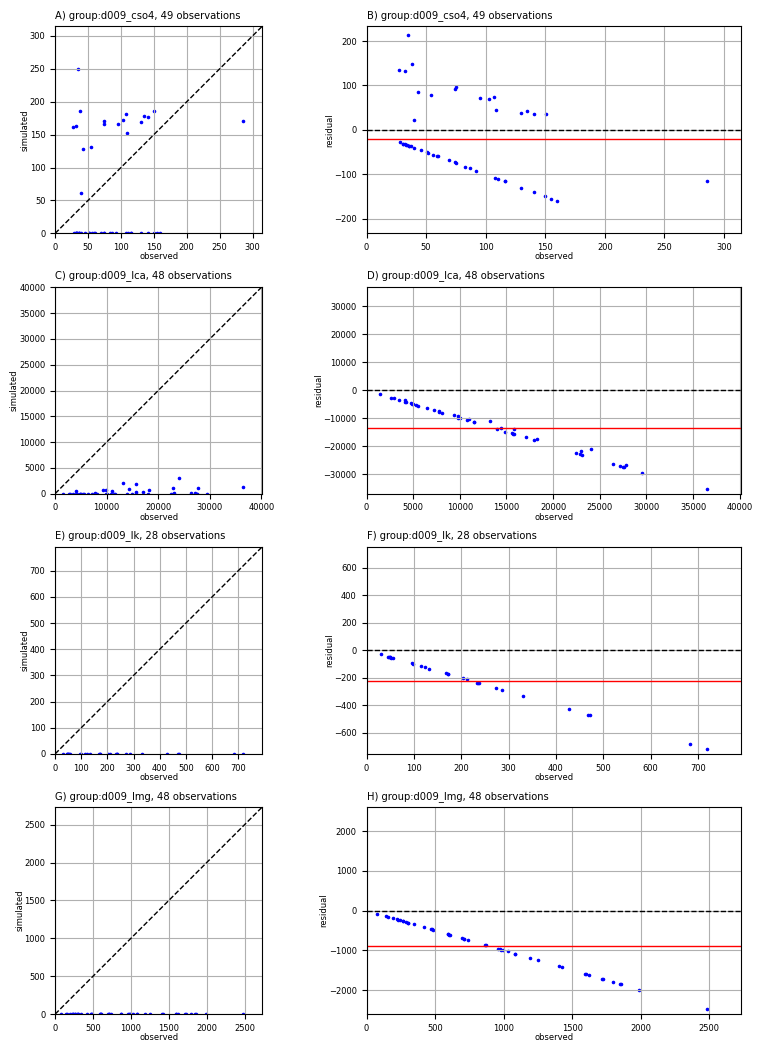

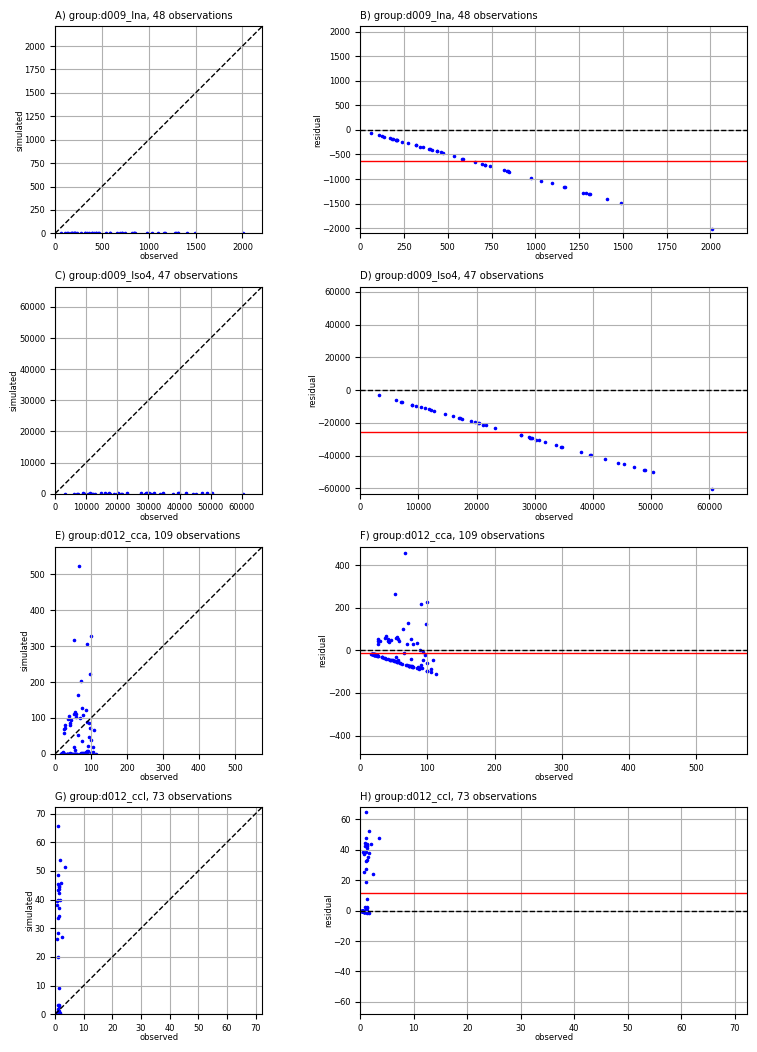

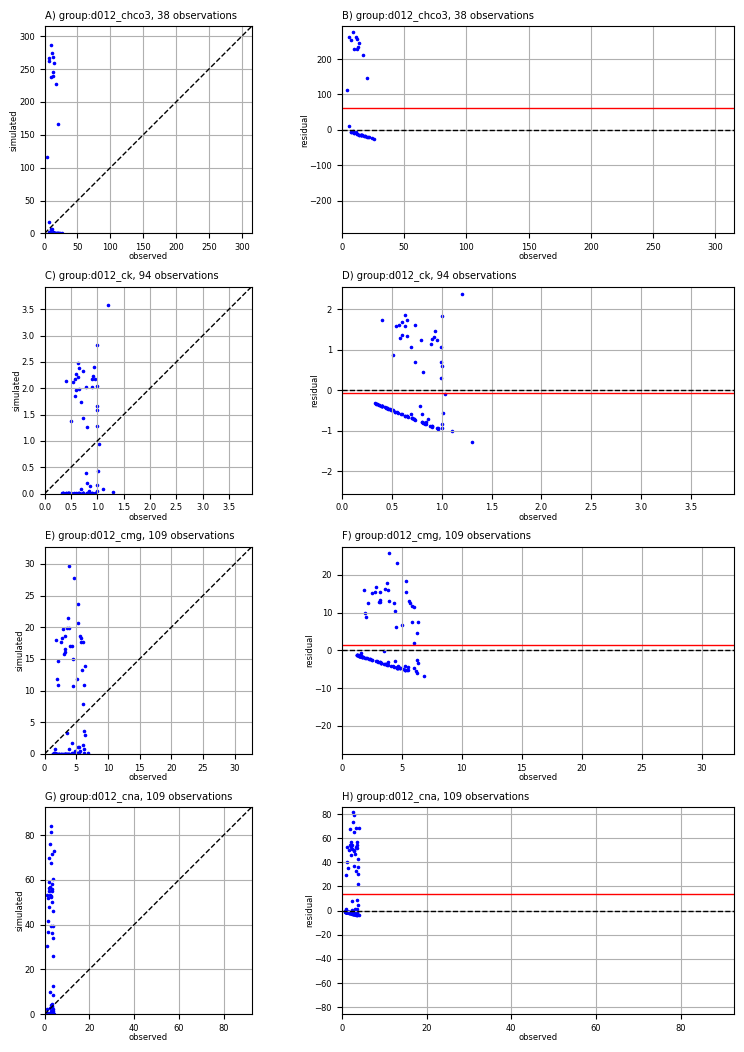

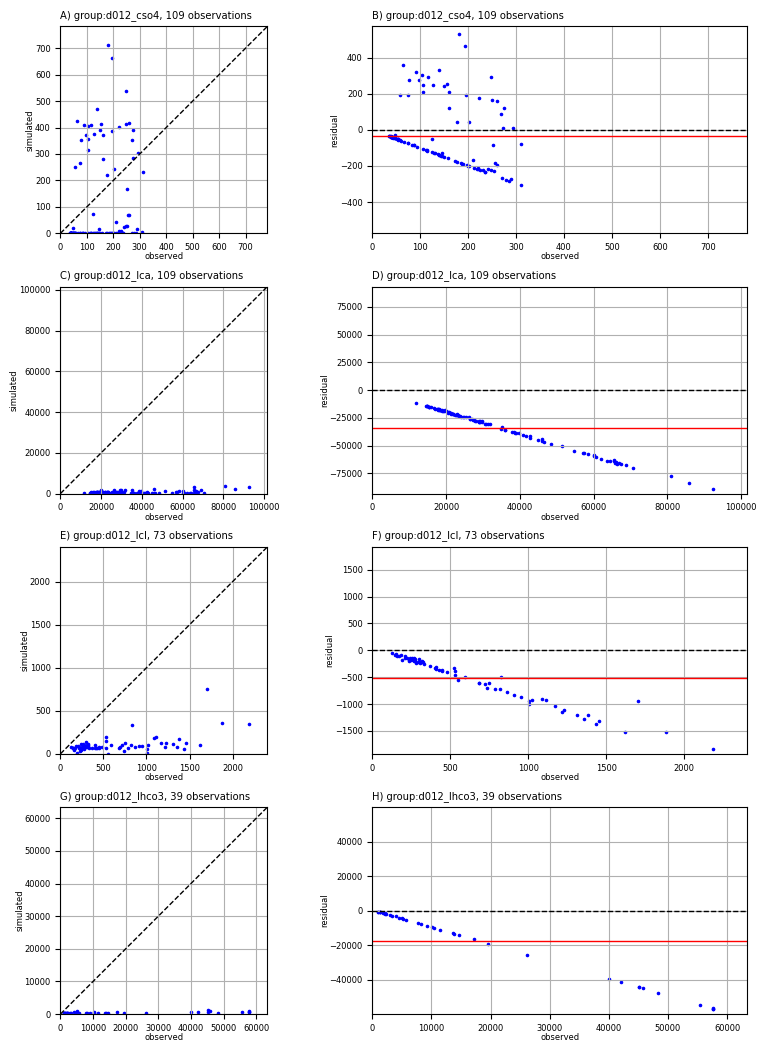

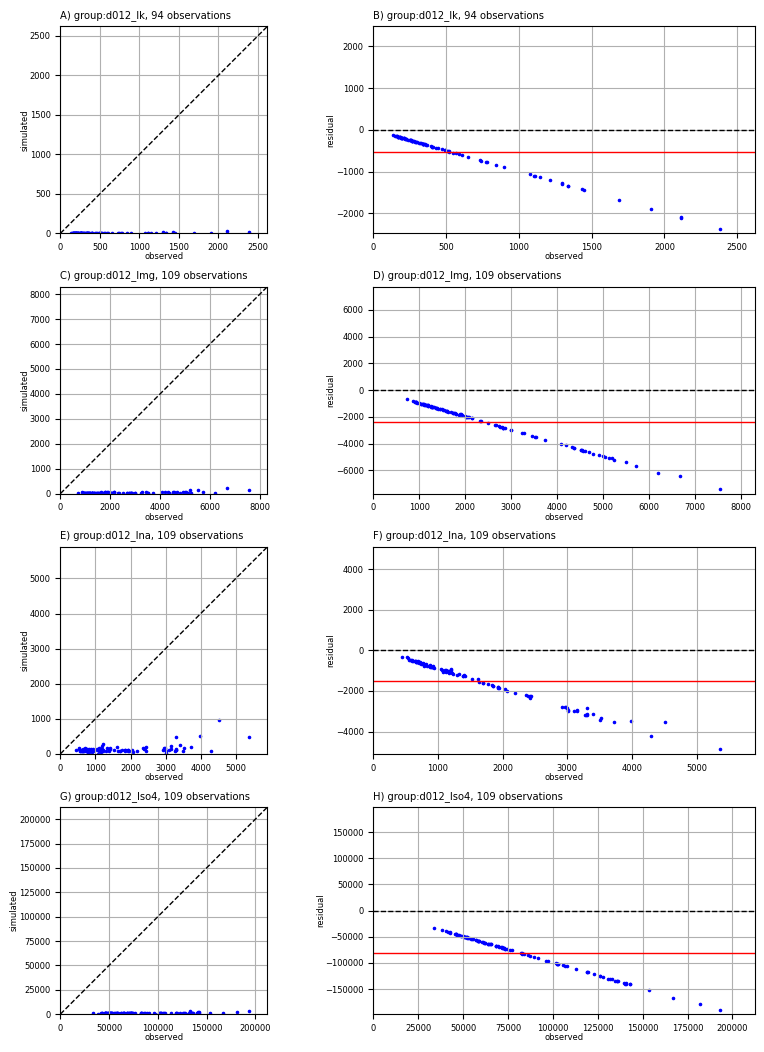

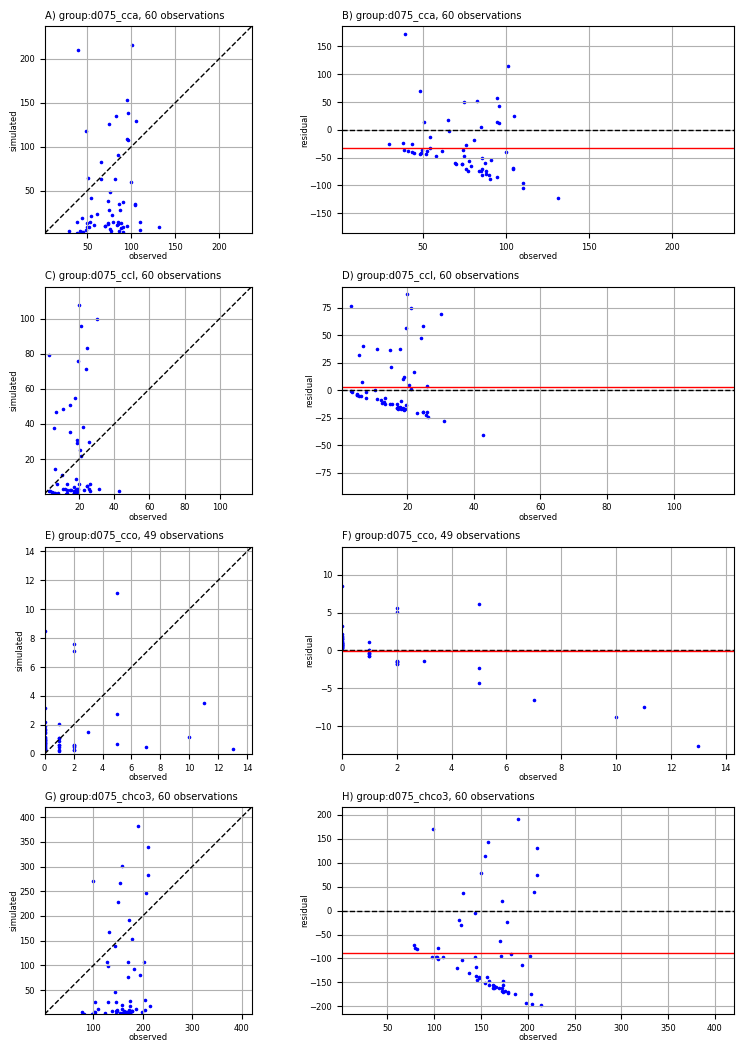

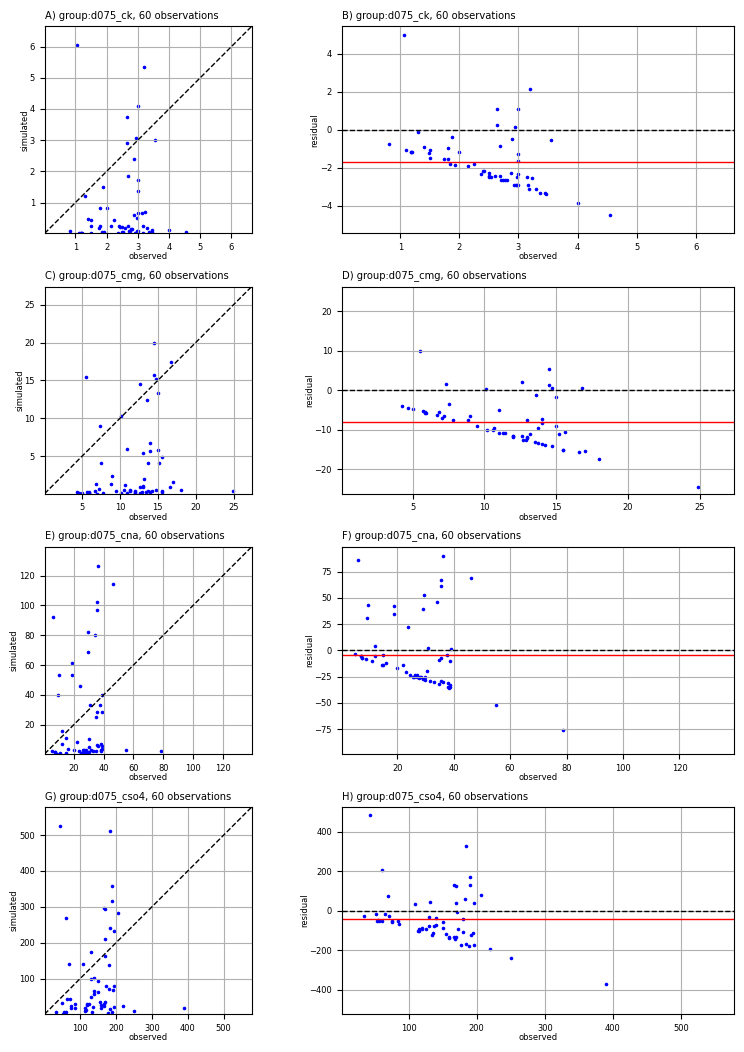

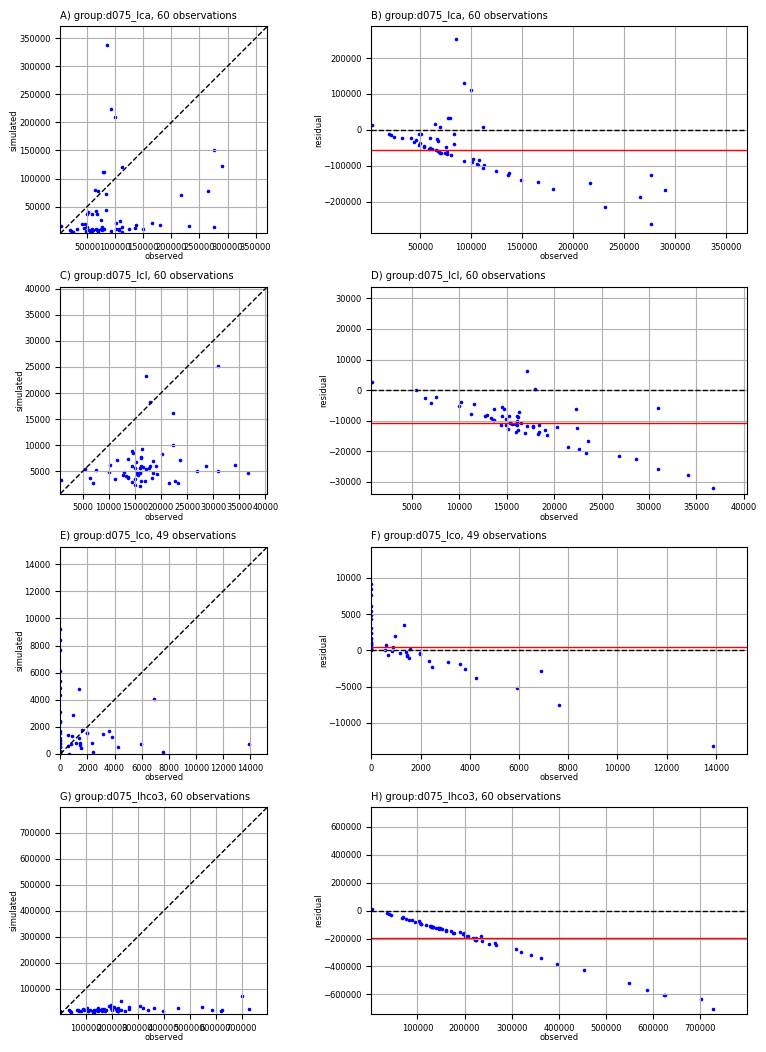

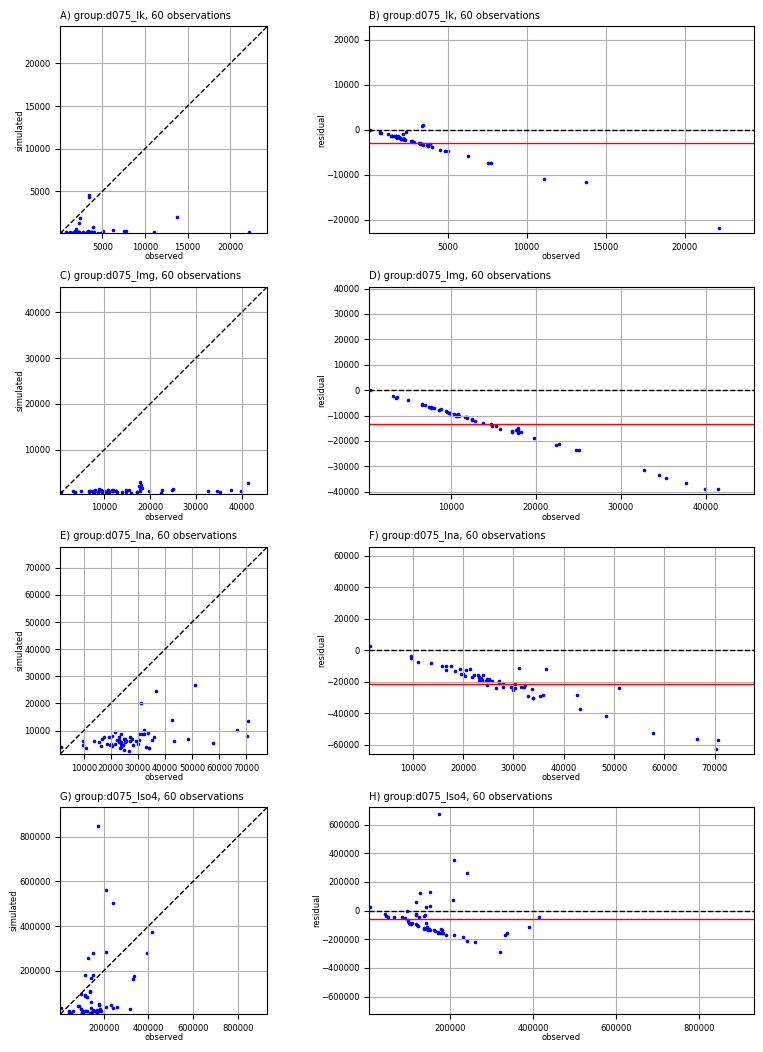

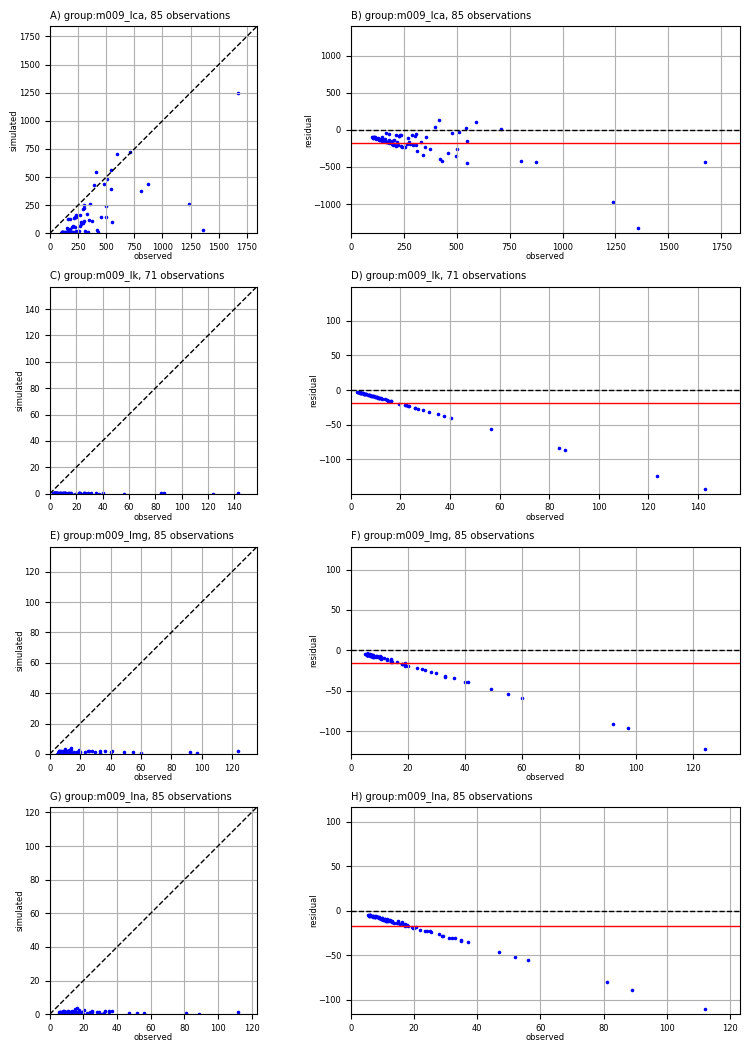

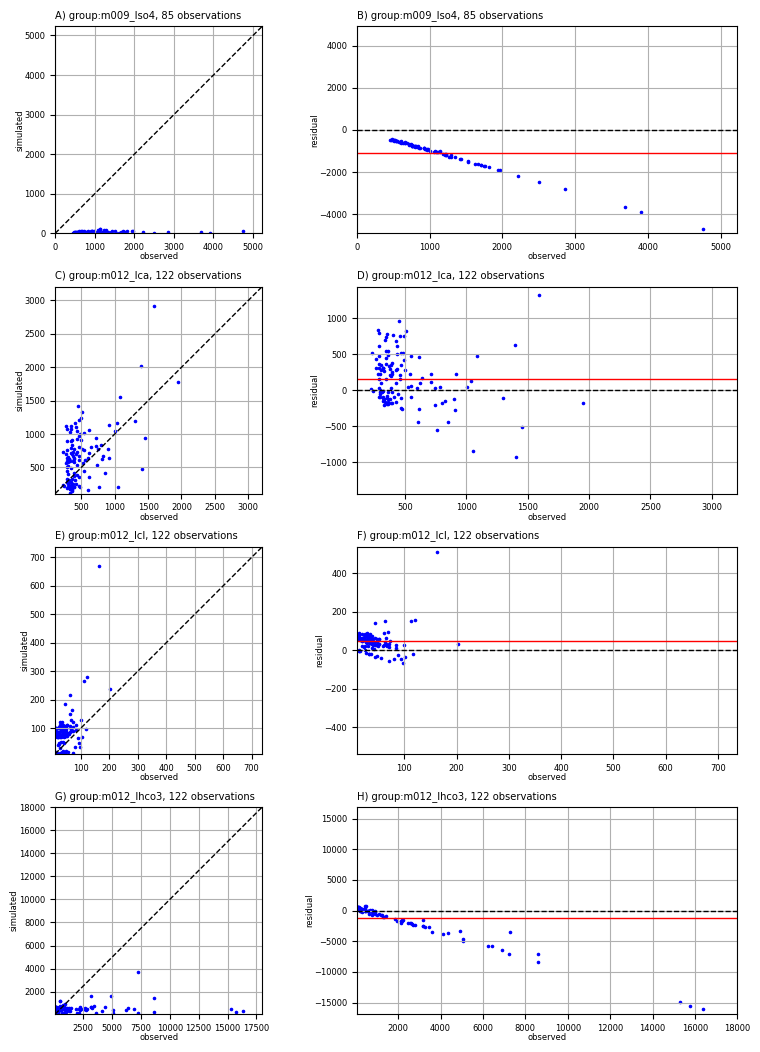

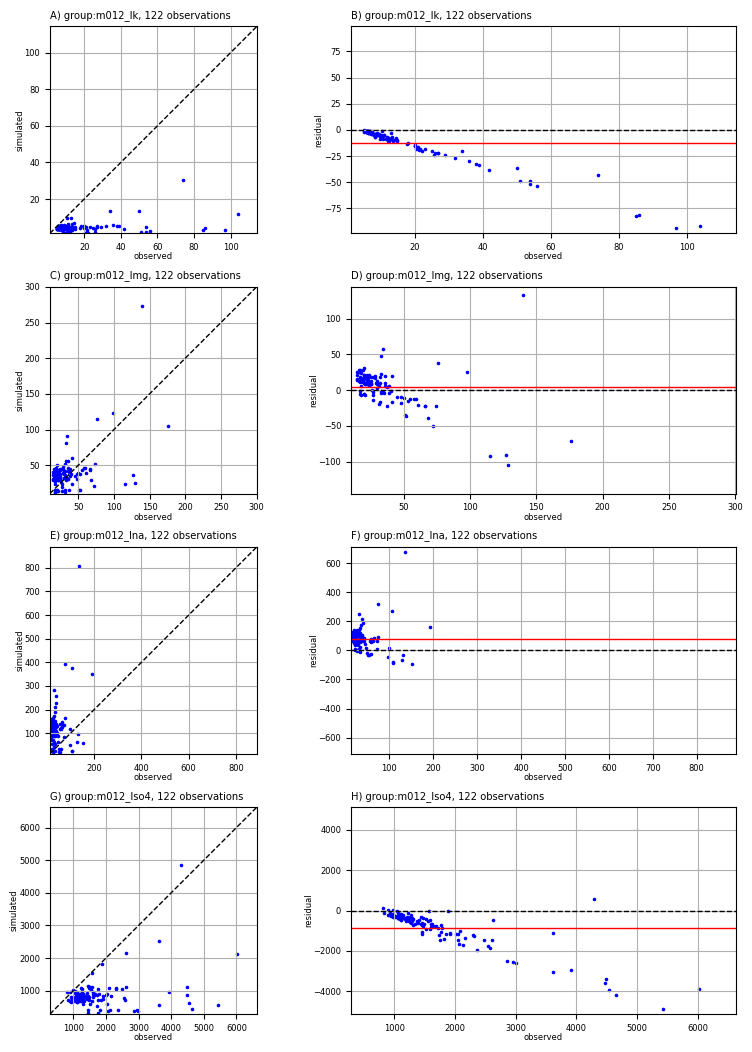

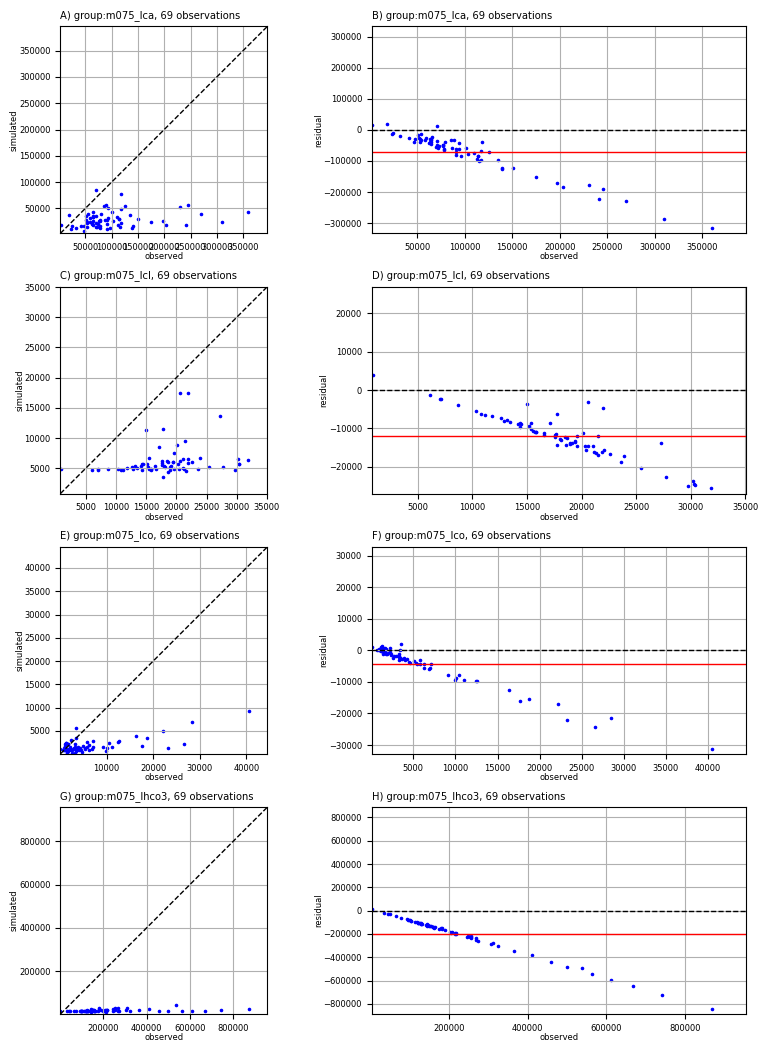

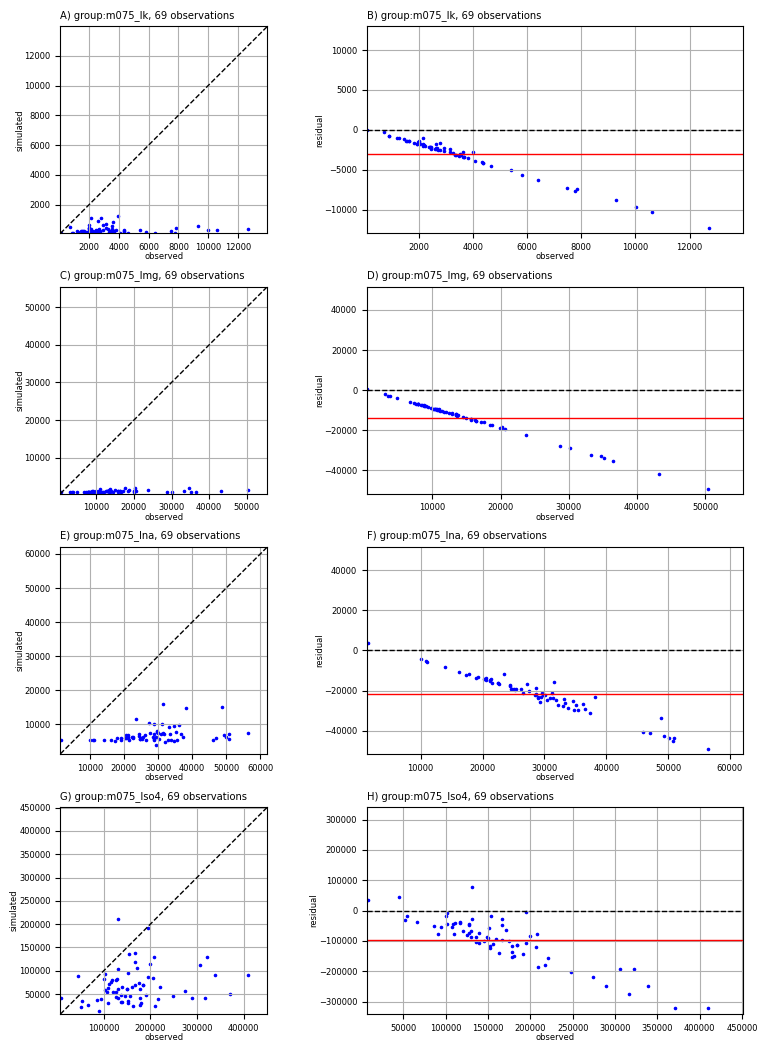

In [20]:
pyemu.plot_utils.res_1to1(pst);

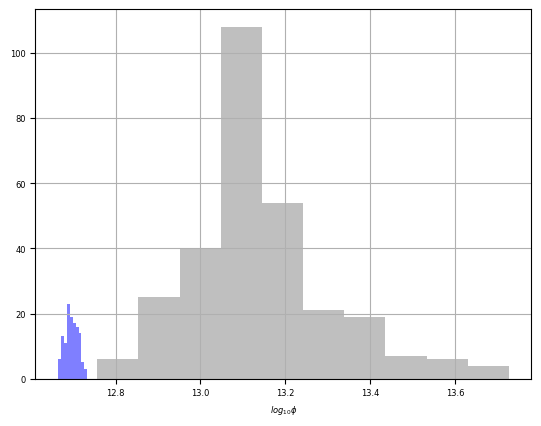

In [23]:
fig,ax = plt.subplots(1,1)
pr_oe.phi_vector.apply(np.log10).hist(ax=ax,fc="0.5",ec="none",alpha=0.5,density=False)
pt_oe.phi_vector.apply(np.log10).hist(ax=ax,fc="b",ec="none",alpha=0.5,density=False)
_ = ax.set_xlabel("$log_{10}\\phi$")

In [30]:
obs = pst.observation_data.copy()

In [31]:
obs

obsnme    obsval  weight     obgnme  oname   
obsnme                                                                     
d009_cca_19961119  d009_cca_19961119      52.4     1.0   d009_cca    NaN  \
d009_cca_19970108  d009_cca_19970108      56.1     1.0   d009_cca    NaN   
d009_cca_19970130  d009_cca_19970130      69.2     1.0   d009_cca    NaN   
d009_cca_19970225  d009_cca_19970225      60.1     1.0   d009_cca    NaN   
d009_cca_19970325  d009_cca_19970325      44.8     1.0   d009_cca    NaN   
...                              ...       ...     ...        ...    ...   
m075_lso4_200906    m075_lso4_200906  220707.0     1.0  m075_lso4    NaN   
m075_lso4_200912    m075_lso4_200912  130089.0     1.0  m075_lso4    NaN   
m075_lso4_201005    m075_lso4_201005  248012.0     1.0  m075_lso4    NaN   
m075_lso4_201007    m075_lso4_201007  116313.0     1.0  m075_lso4    NaN   
m075_lso4_201111    m075_lso4_201111  151840.0     1.0  m075_lso4    NaN   

                   otype  usecol  time   i   j  totim  
obsnme                                                 
d009_cca_19961119    NaN     NaN   NaN NaN NaN    NaN  
d009_cca_19970108    NaN     NaN   NaN NaN NaN    NaN  
d009_cca_19970130    NaN     NaN   NaN NaN NaN    NaN  
d009_cca_19970225    NaN     NaN   NaN NaN NaN    NaN  
d009_cca_19970325    NaN     NaN   NaN NaN NaN    NaN  
...                  ...     ...   ...  ..  ..    ...  
m075_lso4_200906     NaN     NaN   NaN NaN NaN    NaN  
m075_lso4_200912     NaN     NaN   NaN NaN NaN    NaN  
m075_lso4_201005     NaN     NaN   NaN NaN NaN    NaN  
m075_lso4_201007     NaN     NaN   NaN NaN NaN    NaN  
m075_lso4_201111     NaN     NaN   NaN NaN NaN    NaN  

[4486 rows x 11 columns]

In [38]:
def plot_tseries_ensembles(
                    pr_oe, pt_oe, dot=True,
#                     onames=["hds","sfr"]
                    ):
    pst.try_parse_name_metadata()
    # get the observation data from the control file and select 
    obs = pst.observation_data.copy()
    time_col = []
    for i in range(len(obs)):
        if obs.iloc[i, 0][0] == "d":
            time_col.append(obs.iloc[i, 0][-8:])
        elif obs.iloc[i, 0][0] == "m":
            time_col.append(obs.iloc[i, 0][-6:])
    obs.time = time_col
#     # onames provided in oname argument
#     obs = obs.loc[obs.oname.apply(lambda x: x in onames)]
    # only non-zero observations
    obs = obs.loc[obs.obgnme.apply(lambda x: x in pst.nnz_obs_groups),:]
    # make a plot
    ogs = obs.obgnme.unique()
    fig,axes = plt.subplots(len(ogs),1,figsize=(10,2*len(ogs)))
    ogs.sort()
    # for each observation group (i.e. timeseries)
    for ax,og in zip(axes,ogs):
        # get values for x axis
        oobs = obs.loc[obs.obgnme==og,:].copy()
        oobs.loc[:,"time"] = oobs.time.astype(str)
#         oobs.sort_values(by="time",inplace=True)
        tvals = oobs.time.values
        onames = oobs.obsnme.values
        if dot is True:
            # plot prior
            [ax.scatter(tvals,pr_oe.loc[i,onames].values,color="gray",s=30, alpha=0.5) for i in pr_oe.index]
            # plot posterior
            [ax.scatter(tvals,pt_oe.loc[i,onames].values,color='b',s=30,alpha=0.2) for i in pt_oe.index]
            # plot measured+noise 
            oobs = oobs.loc[oobs.weight>0,:]
            tvals = oobs.time.values
            onames = oobs.obsnme.values
    #         [ax.plot(tvals,noise.loc[i,onames].values,"r",lw=0.5,alpha=0.5) for i in noise.index]
            ax.scatter(oobs.time,oobs.obsval,color='red',s=30).set_facecolor("none")
        if dot is False:
            # plot prior
            [ax.plot(tvals,pr_oe.loc[i,onames].values,"0.5",lw=0.5,alpha=0.5) for i in pr_oe.index]
            # plot posterior
            [ax.plot(tvals,pt_oe.loc[i,onames].values,"b",lw=0.5,alpha=0.5) for i in pt_oe.index]
            # plot measured+noise 
            oobs = oobs.loc[oobs.weight>0,:]
            tvals = oobs.time.values
            onames = oobs.obsnme.values
    #         [ax.plot(tvals,noise.loc[i,onames].values,"r",lw=0.5,alpha=0.5) for i in noise.index]
            ax.plot(oobs.time,oobs.obsval,"r-",lw=2)    
        ax.set_title(og,loc="left")
        ax.tick_params(axis='x', labelrotation=45)
        ax.margins(x=0.01)
    fig.tight_layout()
    return fig

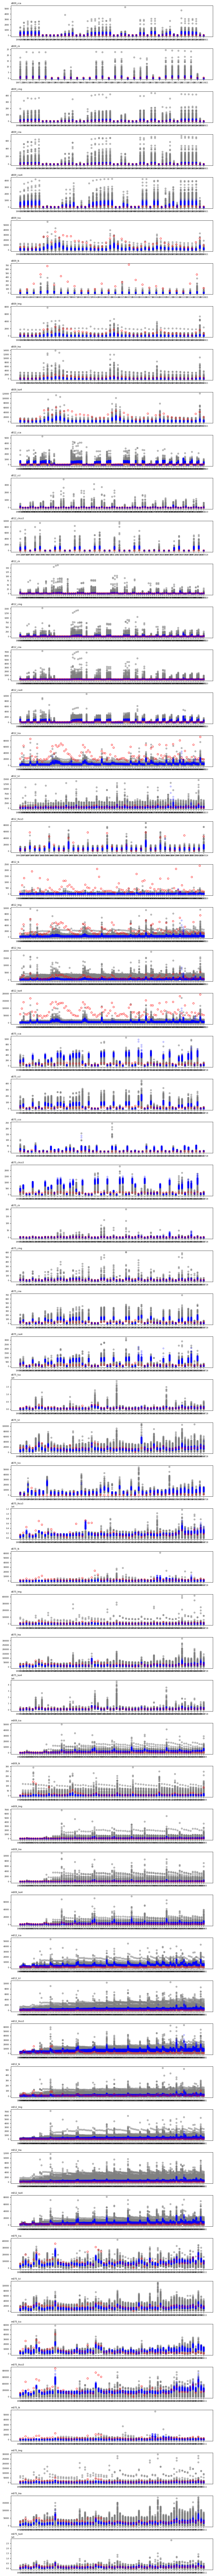

In [37]:
fig = plot_tseries_ensembles(pr_oe, pt_oe)